### K-Nearest  Neighbour(KNN)

Accuracy: 1.0


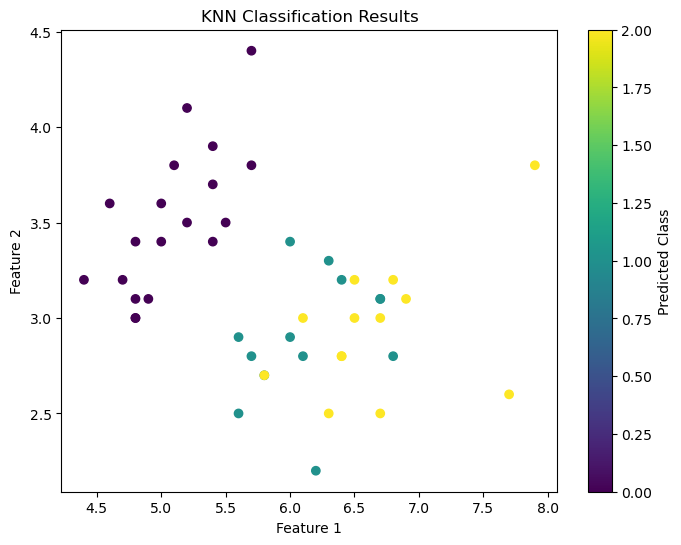

In [1]:
import numpy as np
from scipy.spatial import distance
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [distance.euclidean(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

# Example Usage
if __name__ == "__main__":
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    # Load dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Split dataset into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train the model
    model = KNNClassifier(k=3)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = model.accuracy(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Optional: Plotting for 2D data (using only the first two features for simplicity)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', label='Predicted')
    plt.colorbar(scatter, label='Predicted Class')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('KNN Classification Results')
    plt.show()
